# MNIST Digit Classification using Deep Learning (Neural Network)

Importing Essential Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNSIT data from keras.datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data = 60,000 images
Test Data = 10,000 images

Image Dimension => 28 X 28
Grayscale Image => 1 channel

In [5]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


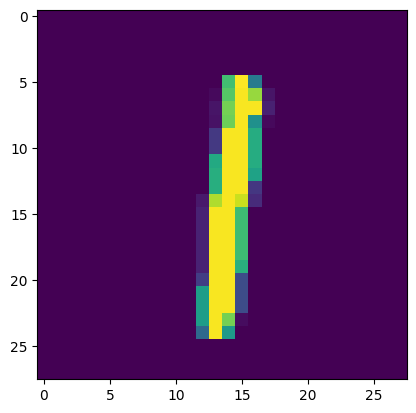

1


In [8]:
# displaying the image
plt.imshow(X_train[40])
plt.show()

# print the corresponding label
print(Y_train[40])

Image labels

In [9]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [10]:
print(np.unique(Y_train))

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


 We can use these labels as they are or we can also apply one-hot encoding


 All the images have the same dimensions in the dataset, if they were not, we have to resize all the images to a common distribution

In [11]:
X_train = X_train/255
X_test = X_test/255

Printing the 10th image

In [12]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Builiding the Neural Network

Setting up the layers of NN

In [13]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

Compiling the Model

In [14]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the Model

In [15]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3008 - accuracy: 0.9129
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1417 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1058 - accuracy: 0.9677
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0872 - accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0711 - accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0620 - accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9828
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0456 - accuracy: 0.9859
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0399 - accuracy: 0.9875
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.036

Training data accuracy = 98.8%

Accuracy on Test Data

In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0964 - accuracy: 0.9739
0.9739000201225281


Test Data Accuracy : 97.3 %

In [17]:
print(X_test.shape)

(10000, 28, 28)


First data in X_test

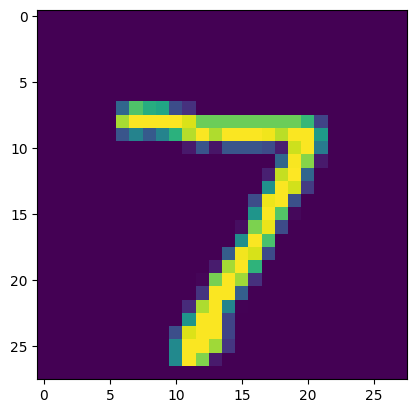

In [18]:
plt.imshow(X_test[0])
plt.show()

In [19]:
print(Y_test[0])

7


In [20]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
print(Y_pred.shape)

(10000, 10)


In [22]:
print(Y_pred[0])

[9.3826393e-06 5.8261767e-02 4.6819571e-01 9.9715275e-01 1.2701151e-06
 7.1802050e-02 4.6218840e-10 9.9999690e-01 7.5521432e-03 6.9627720e-01]


model.predict() gives the prediction probability of each class for that data point

Converting predicion probabilities to class label

In [23]:
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


Doing the same thing for all test data points

In [24]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test => True labels

Y_pred_labels => Predicted labels

Confusion Matrix

In [25]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [26]:
print(conf_mat)

tf.Tensor(
[[ 966    0    1    0    1    2    4    1    4    1]
 [   0 1123    3    3    0    2    1    1    2    0]
 [   2    1 1013    2    3    0    0    5    5    1]
 [   0    0    8  969    2   16    0    5    3    7]
 [   0    0    4    0  948    2    2   10    0   16]
 [   2    1    0    8    2  872    2    1    4    0]
 [   8    3    3    2    3   10  923    0    6    0]
 [   1    3   10    2    0    1    0 1003    2    6]
 [   3    0    2    4    3    8    0    3  948    3]
 [   3    2    0    6    7    7    0    7    3  974]], shape=(10, 10), dtype=int32)


Visualizaing True Labels vs Predicted Labels

Text(0.5, 47.7222222222222, 'Predicted Labels')

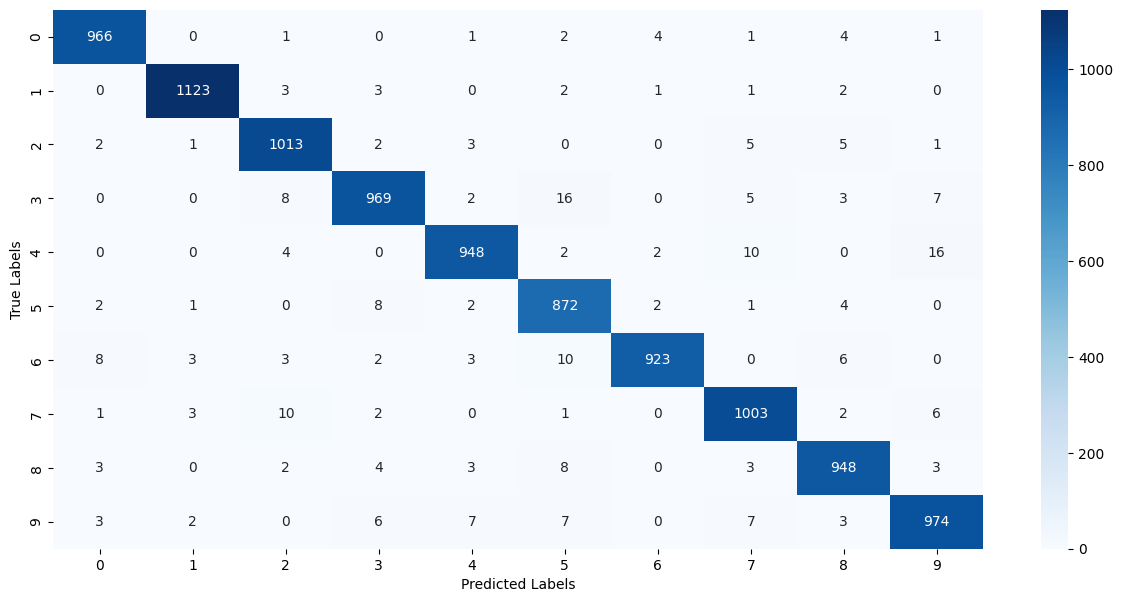

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a predicting system

In [28]:
#Loading the prediction image
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [29]:
type(input_image)

numpy.ndarray

In [30]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


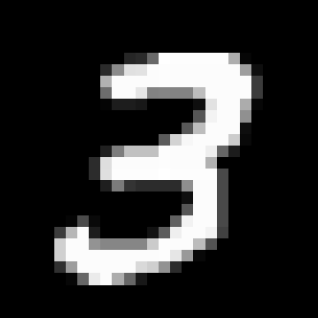

In [31]:
cv2_imshow(input_image)

Analyzing input image

In [32]:
input_image.shape

(318, 318, 3)

Grayscaling

In [33]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [34]:
grayscale.shape

(318, 318)

In [35]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [36]:
input_image_resize.shape

(28, 28)

In [37]:
cv2_imshow(input_image_resize)

Scaling the image

In [38]:
input_image_resize = input_image_resize/255

In [39]:
type(input_image_resize)

numpy.ndarray

In [40]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [41]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 24ms/step
[[1.8243293e-06 7.1237177e-01 8.3205238e-02 1.0000000e+00 2.3042041e-16
  3.5551807e-03 2.2724105e-18 2.2453560e-04 6.5527821e-01 9.0487146e-01]]


In [42]:
input_pred_label = np.argmax(input_prediction)

In [43]:
print(input_pred_label)

3


Complete Predicting System

Path of the image to be predicted: /content/MNIST_digit.png


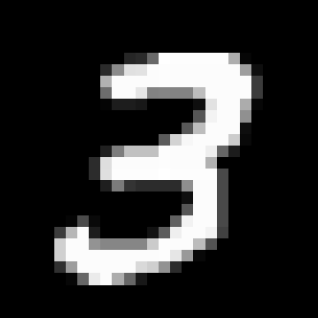

1/1 [==============================] - 0s 45ms/step
The Handwritten Digit is recognised as  3


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)